MultinomialNB

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [2]:
# Now Load the dataset
data_ = fetch_20newsgroups()
# Get the text categories in action
text_categories_ = data_.target_names
# Now we define the training set
train_data_ = fetch_20newsgroups(subset="train", categories=text_categories_)
# define the test set
test_data_ = fetch_20newsgroups(subset="test", categories=text_categories_)

In [ ]:
print("Number of unique classes {}".format(len(text_categories_)))
print("Number of training samples {} ".format(len(train_data_.data)))
print("Number of test samples {}".format(len(test_data_.data)))

Number of unique classes 20
Number of training samples 11314 
Number of test samples 7532


In [ ]:
print(test_data_.data[1])

From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.

Rick Miller  <rick@ee.uwm.edu> | <ricxjo@discus.mil.wi.us>   Ricxjo Muelisto
Send a postcard, get one back! | Enposxtigu bildkarton kaj vi ricevos alion!
          RICK MILLER // 16203 WOODS // MUSKEGO, WIS. 53150 // USA



In [ ]:
# Model building
#TfidfVectorizer-Convert a collection of raw documents to a matrix of TF-IDF features.
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Training the model with the training data
model.fit(train_data_.data, train_data_.target)
# Predicting the test data categories
predicted_categories = model.predict(test_data_.data)

In [ ]:
print(np.array(test_data_.target_names)[predicted_categories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


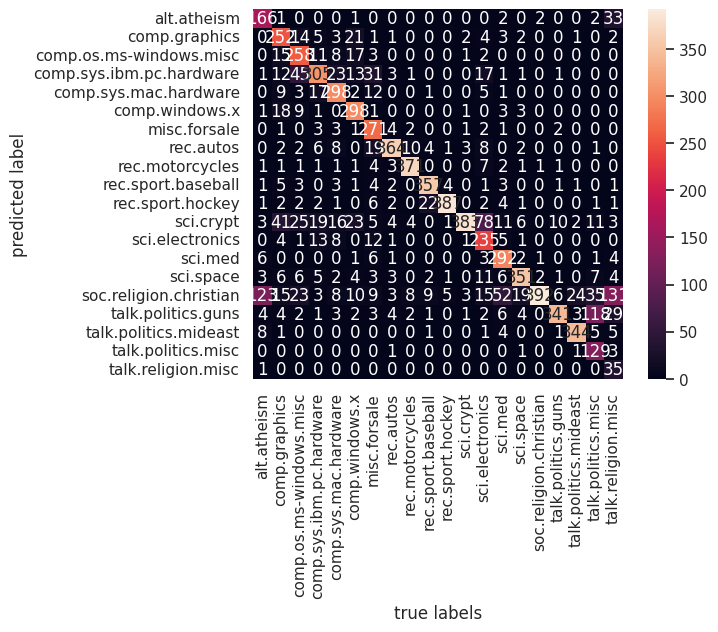

Accuracy: 0.7738980350504514


In [ ]:
# plotting the confusion matrix
mat = confusion_matrix(test_data_.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data_.target_names,yticklabels=train_data_.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("Accuracy: {}".format(accuracy_score(test_data_.target, predicted_categories)))

Bernoulli Naive Bayes

In [ ]:
# Create a dataset
from sklearn.datasets import make_classification
nb_samples = 300
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)


0.8666666666666667

In [ ]:
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
bnb.predict(data)

array([0, 0, 1, 1])

Guassian Naive Bayes

In [ ]:
# cleaning texts
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
# stemming- It is used for reducing the words or chopping the words into their root forms
#The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner
# morphological and inflexional endings from words in English.
from nltk.stem.porter import PorterStemmer
#CountVectorizer converts a collection of text documents into a matrix where the rows represent
#the documents, and the columns represent the tokens
from sklearn.feature_extraction.text import CountVectorizer

dataset = [["I liked the movie", "positive"],
		["It’s a good movie. Nice story", "positive"],
		["Hero’s acting is bad but heroine looks good.\
			Overall nice movie", "positive"],
			["Nice songs. But sadly boring ending.", "negative"],
			["sad movie, boring movie", "negative"]]

dataset = pd.DataFrame(dataset)
dataset.columns = ["Text", "Reviews"]
nltk.download('stopwords')
corpus = []
for i in range(0, 5):
	text = re.sub('[^a-zA-Z]', '', dataset['Text'][i])
	text = text.lower()
	text = text.split()
	ps = PorterStemmer()
	text = ''.join(text)
	corpus.append(text)
# creating bag of words model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# splitting the data set into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
classifier = GaussianNB();
classifier.fit(X_train, y_train)
# predicting test set results
y_pred = classifier.predict(X_test)
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0],
       [2, 0]])

In [ ]:
print("Accuracy: {}".format(accuracy_score(y_pred, y_test)))

Accuracy: 0.0
